In [2]:
import pandas as pd
import pickle
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import classification_report

Mounted at /content/drive


In [3]:
!pip install tensorflow scikeras scikit-learn

In [4]:
#grid search
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from tensorflow.keras.constraints import MaxNorm
from sklearn.metrics import matthews_corrcoef
from imblearn.metrics import geometric_mean_score


In [5]:
path = '/content/drive/My Drive /Colab Notebooks//CustomerChurn_dataset.csv'

In [6]:
with open (path) as datas:
  data = pd.read_csv(datas)

In [7]:

data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
data.replace(' ',np.nan,inplace = True)

In [9]:
data.dropna(inplace = True)

In [10]:

data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
data['TotalCharges'] =pd.to_numeric(data['TotalCharges'],errors='coerce')
data.drop(columns='customerID', inplace = True)

In [12]:
dependency_variables =[]
for i in data.columns:
  if data[i].dtype == 'O':
    dependency_variables.append(i)


In [13]:
dependency_variables

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

EXPLORATORY DATA ANALYSIS

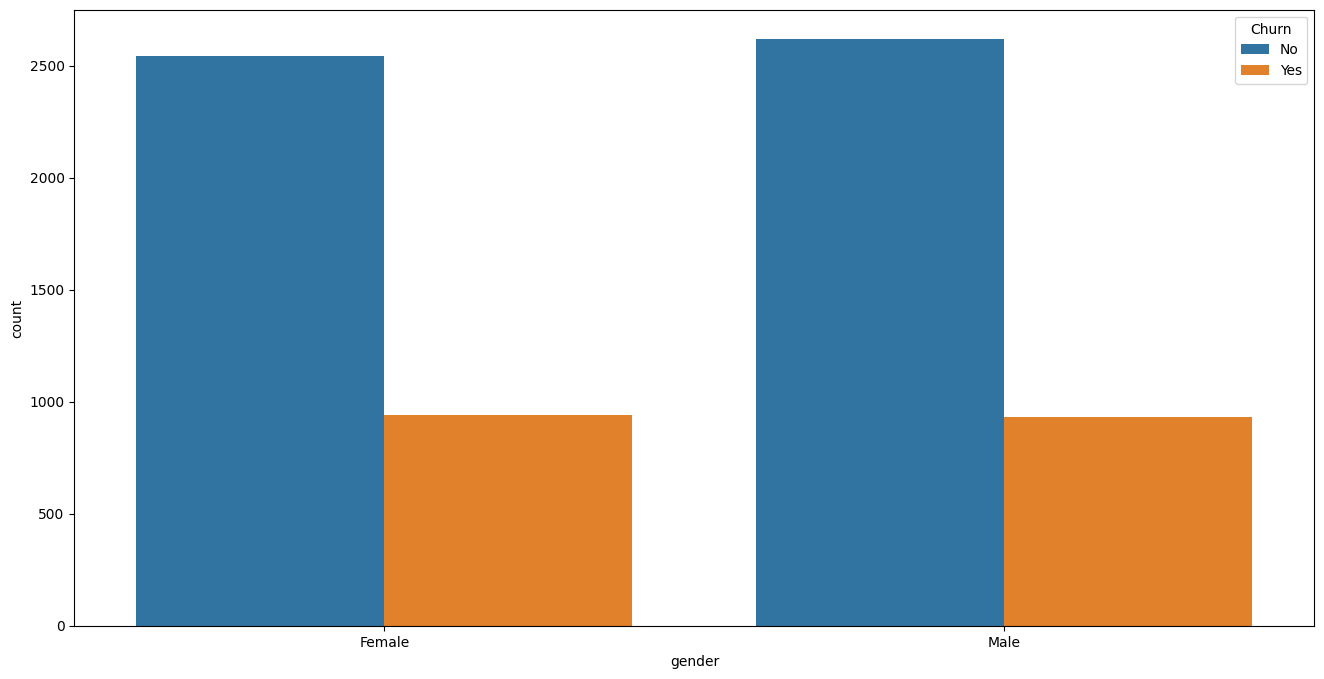

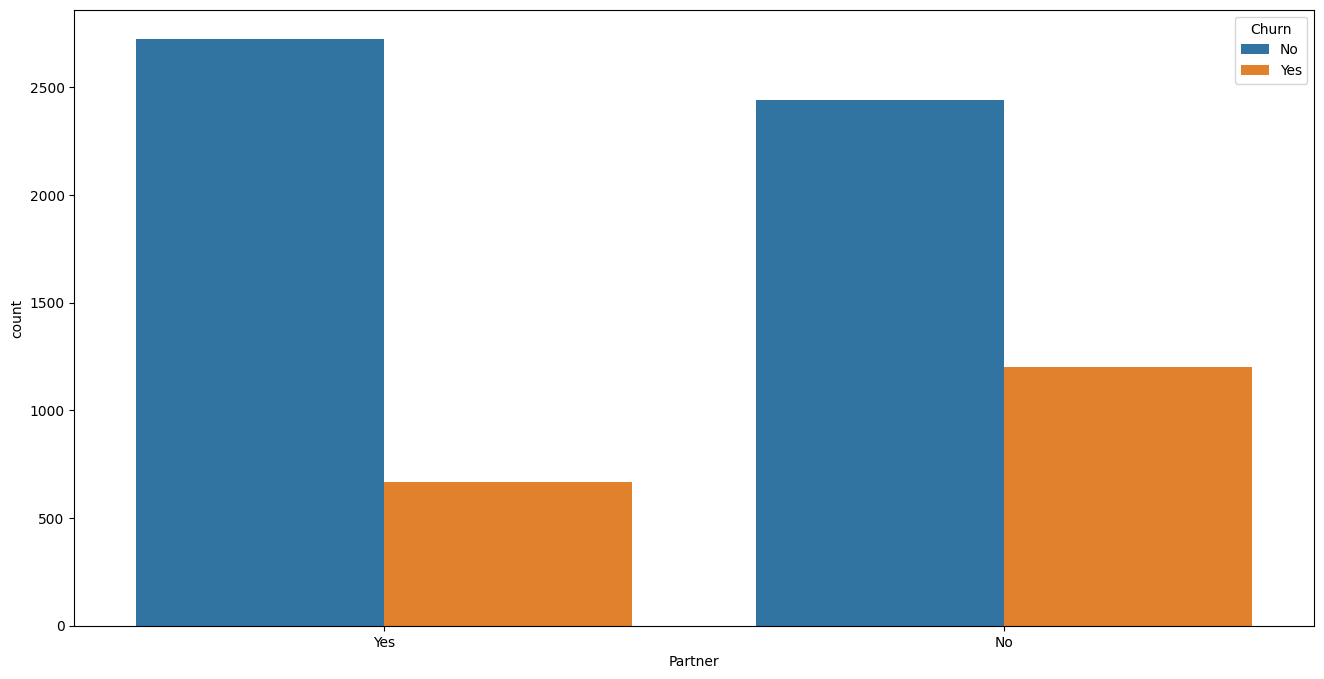

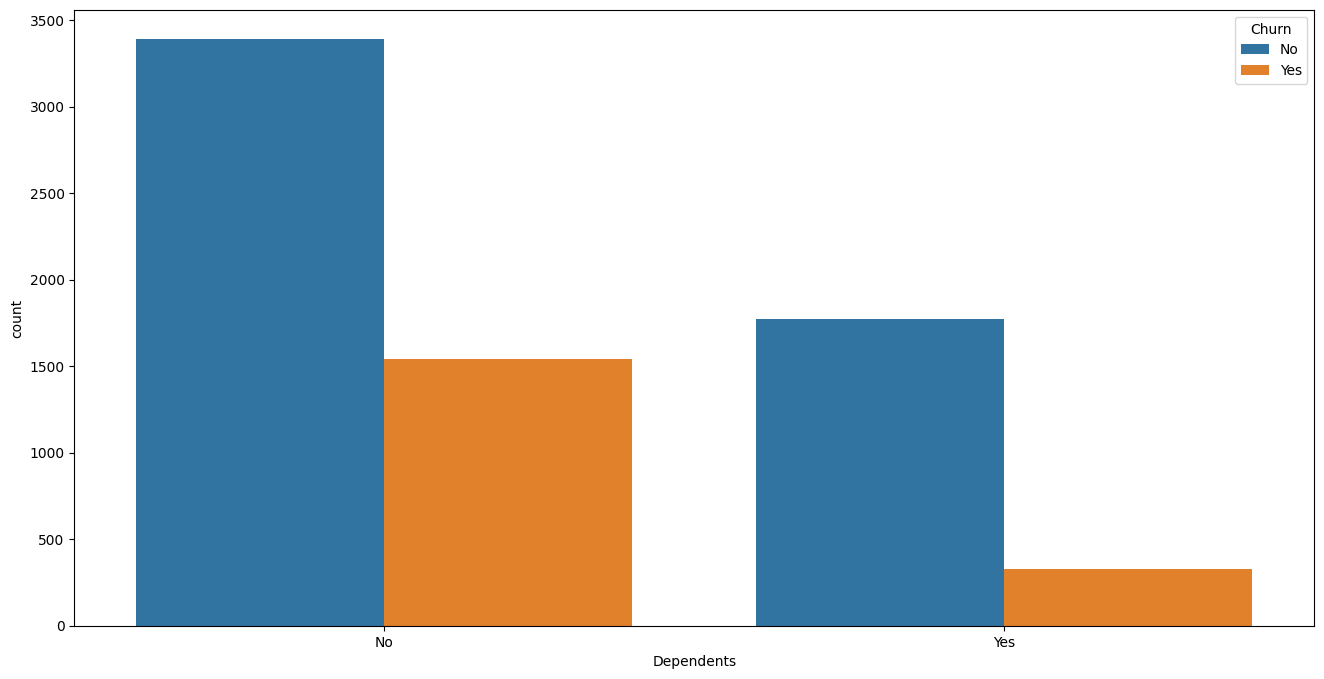

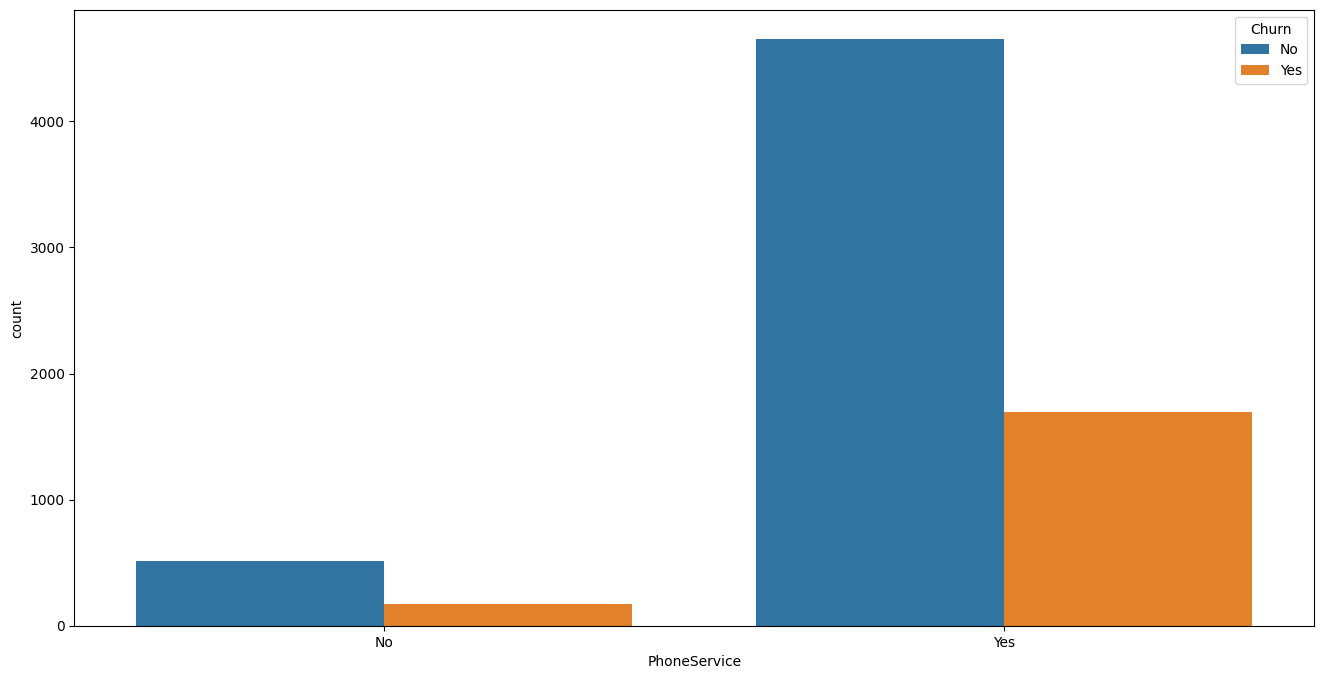

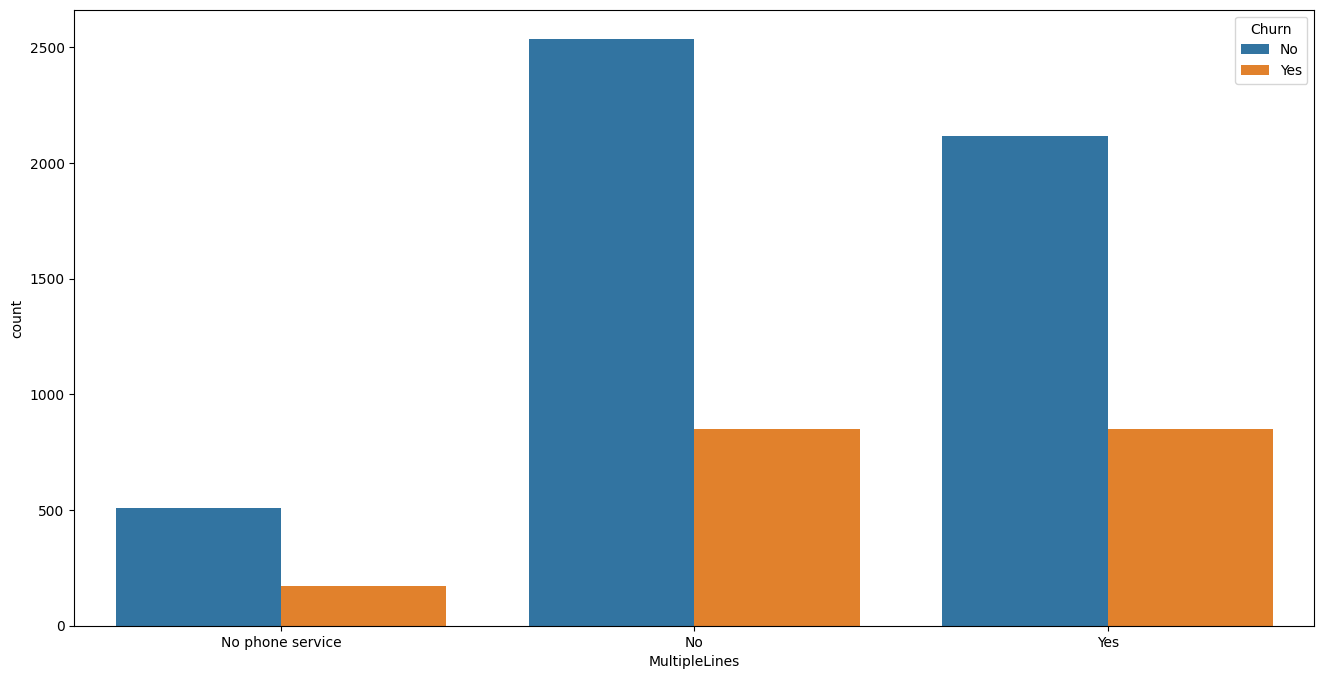

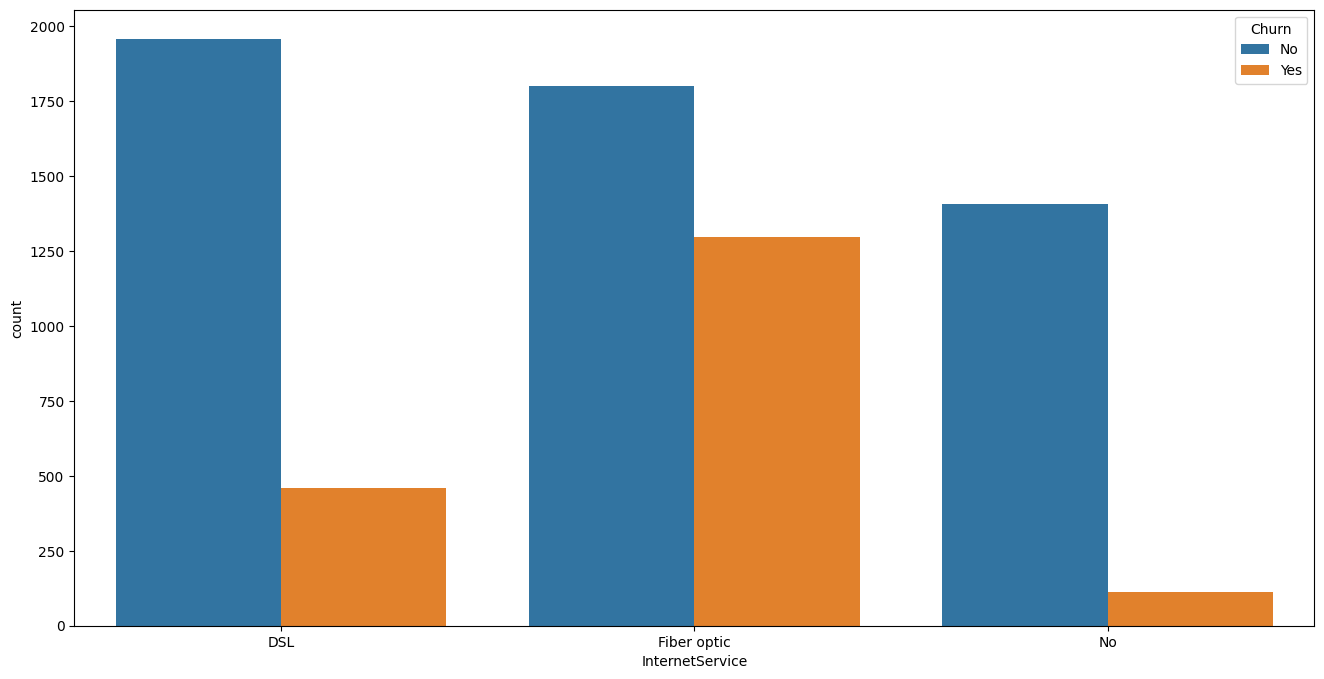

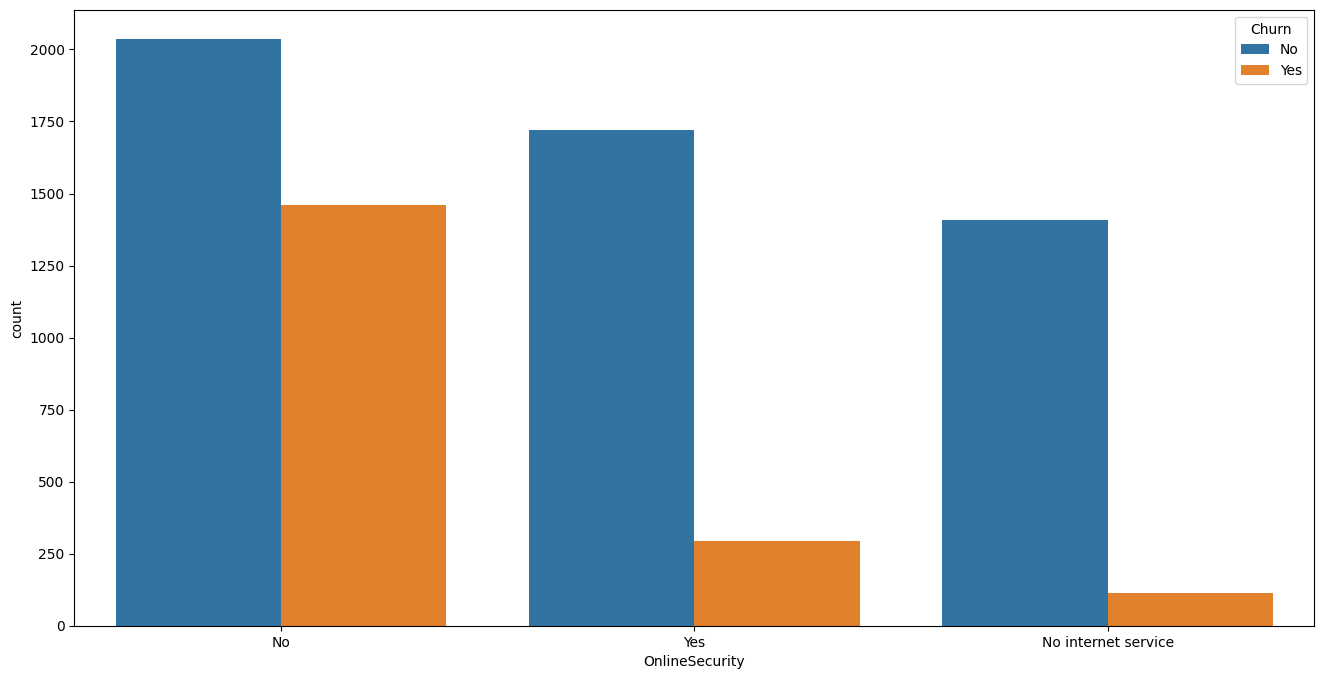

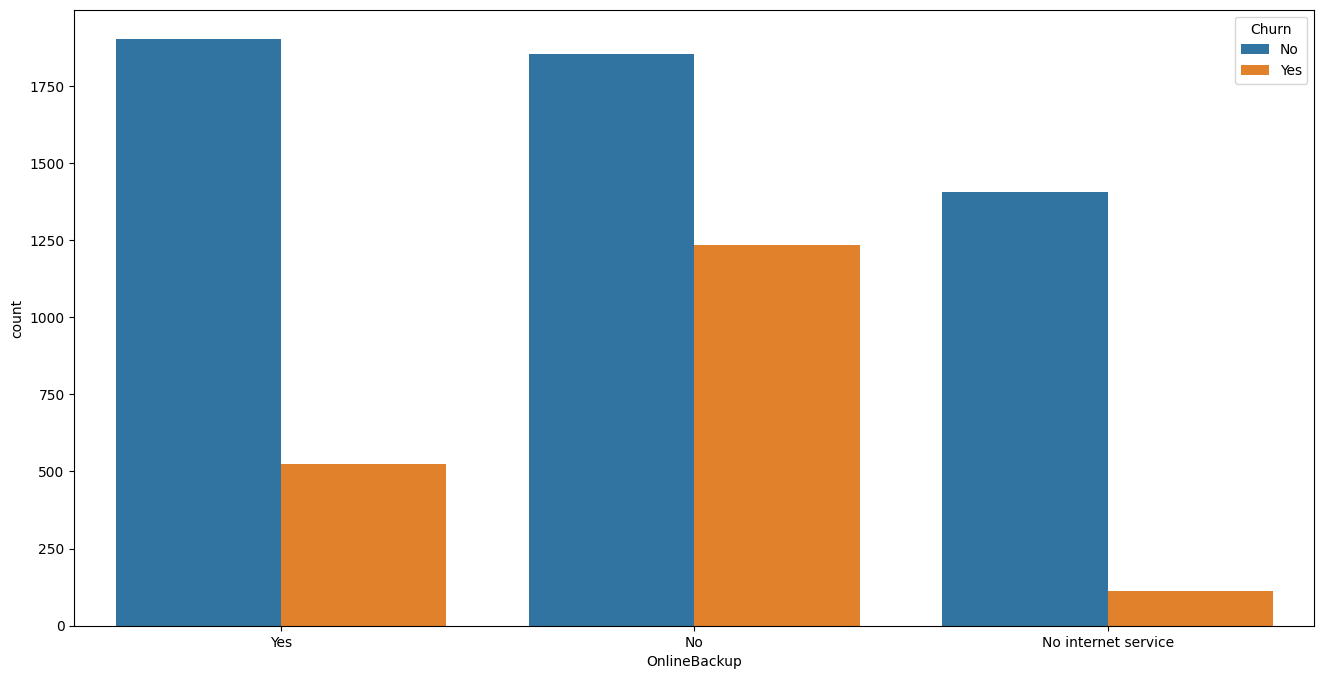

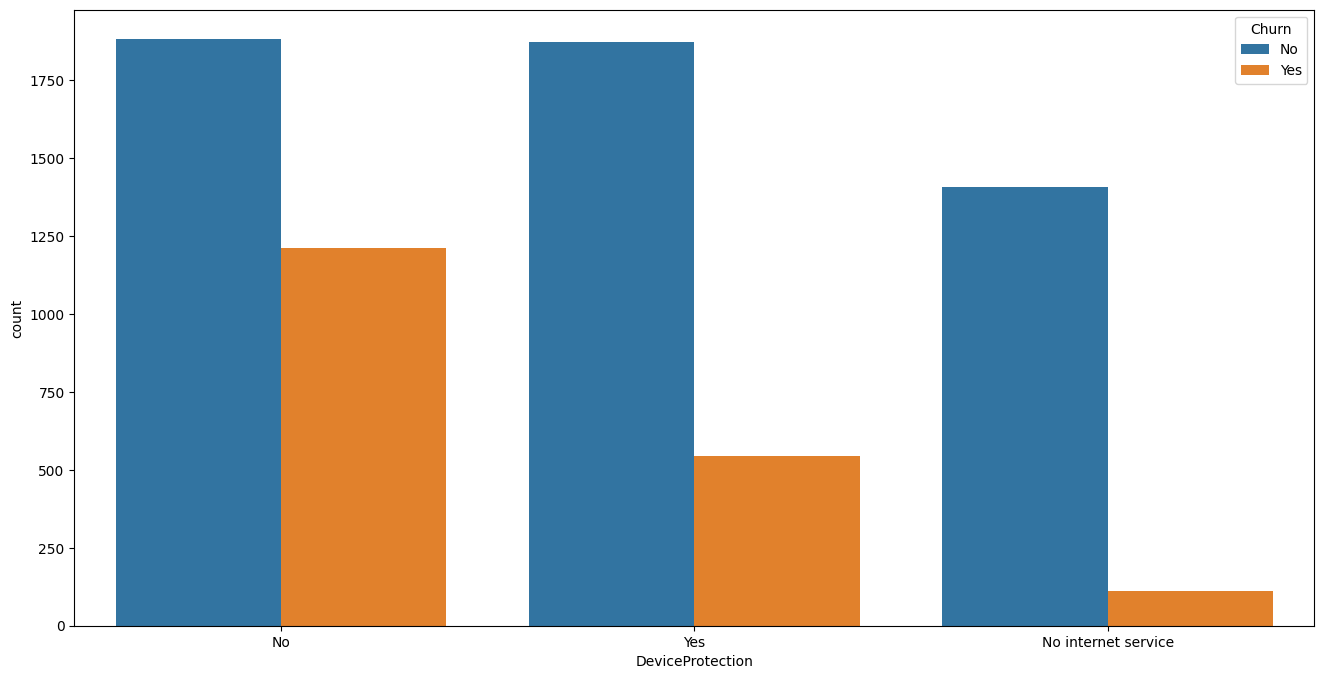

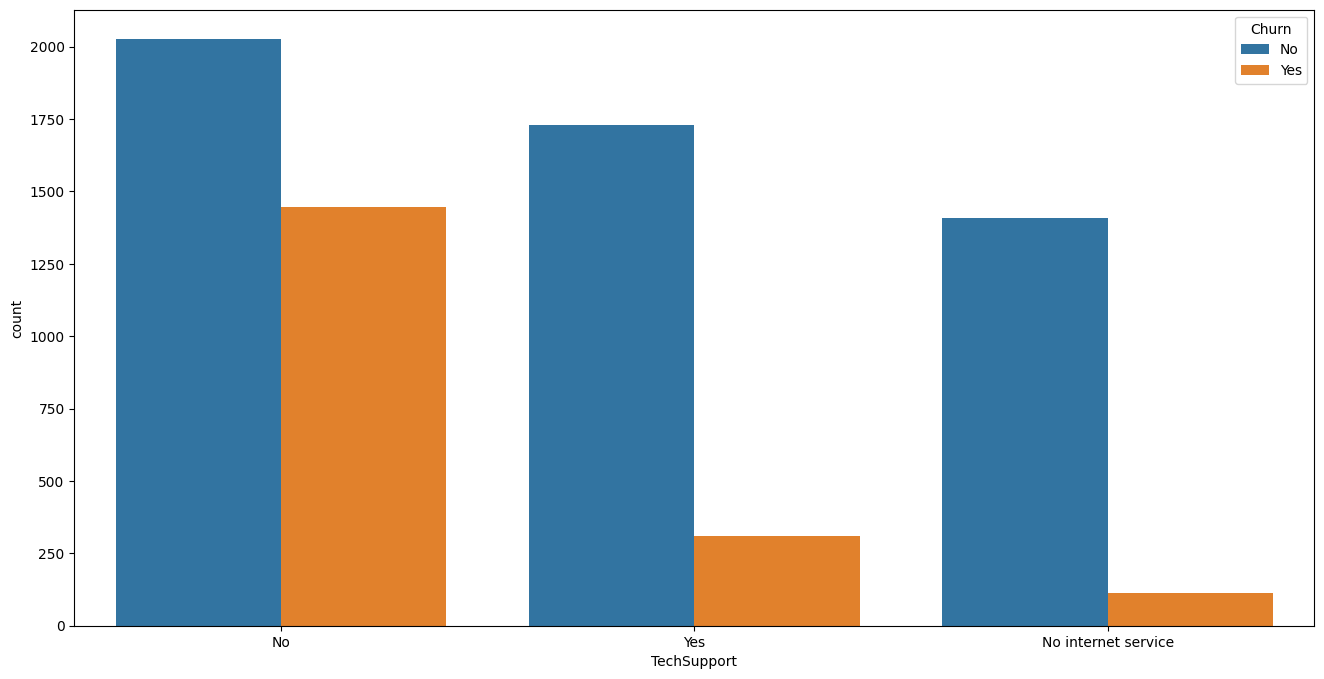

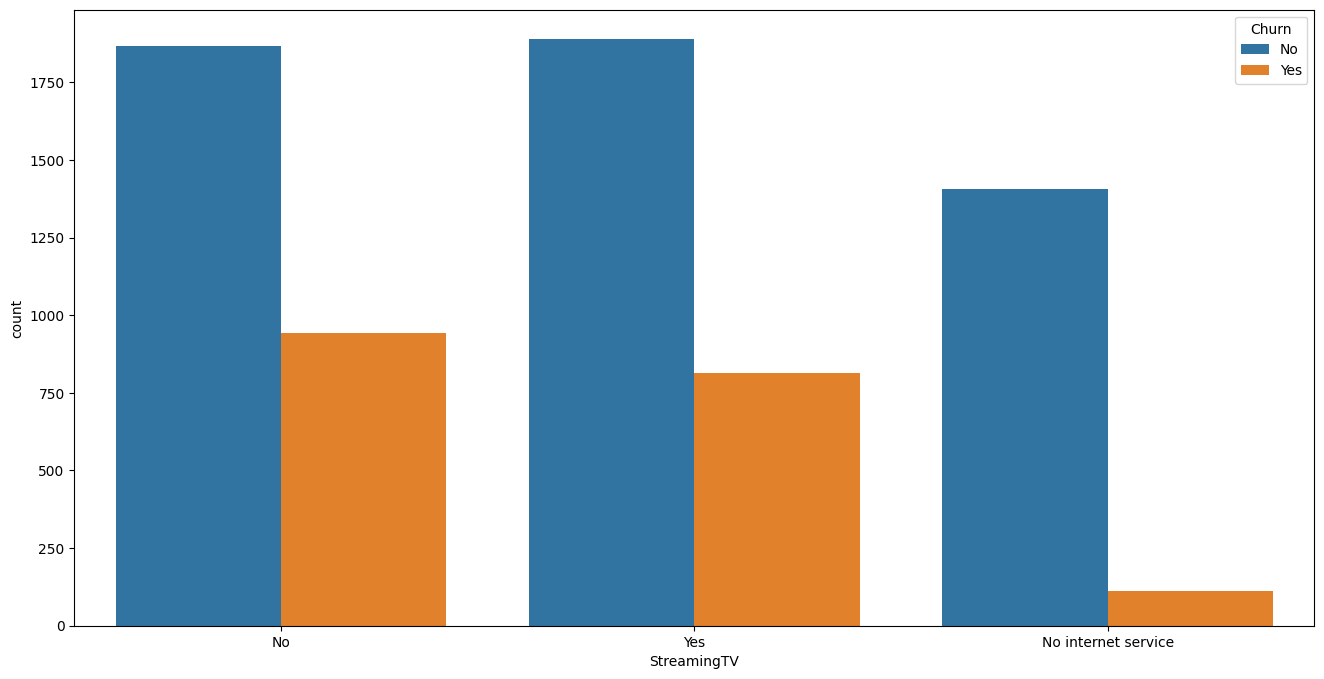

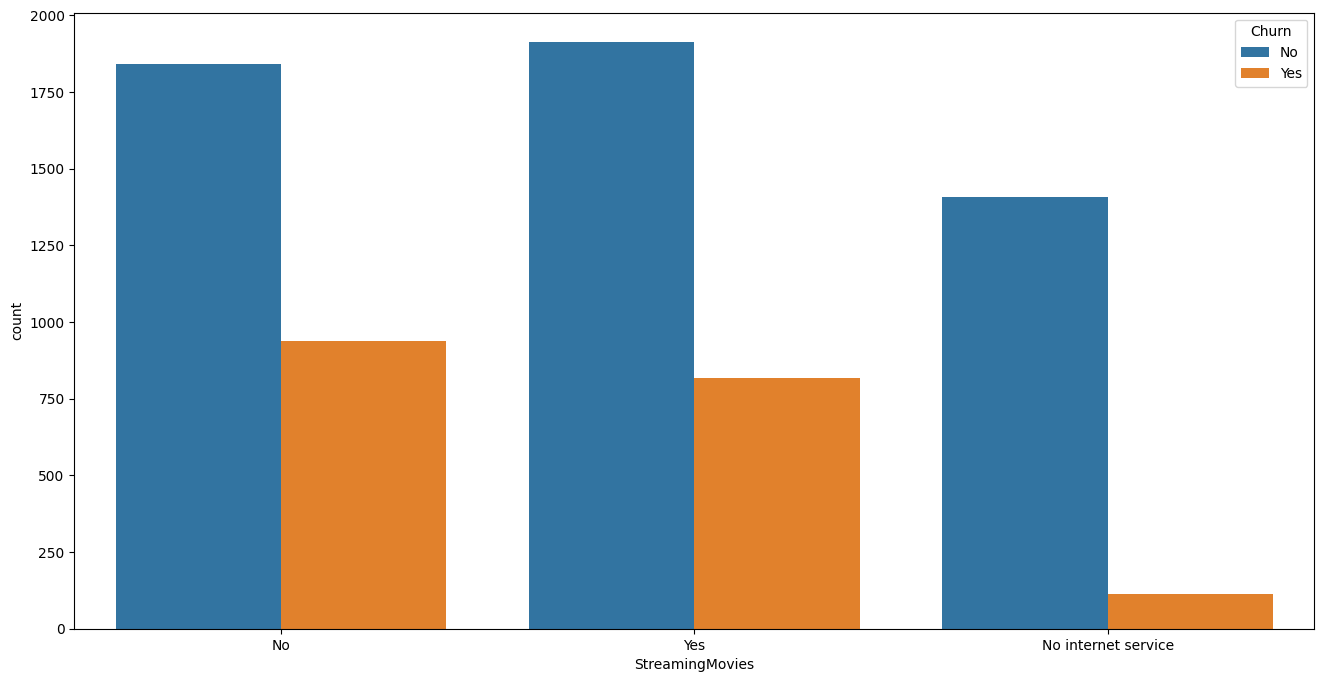

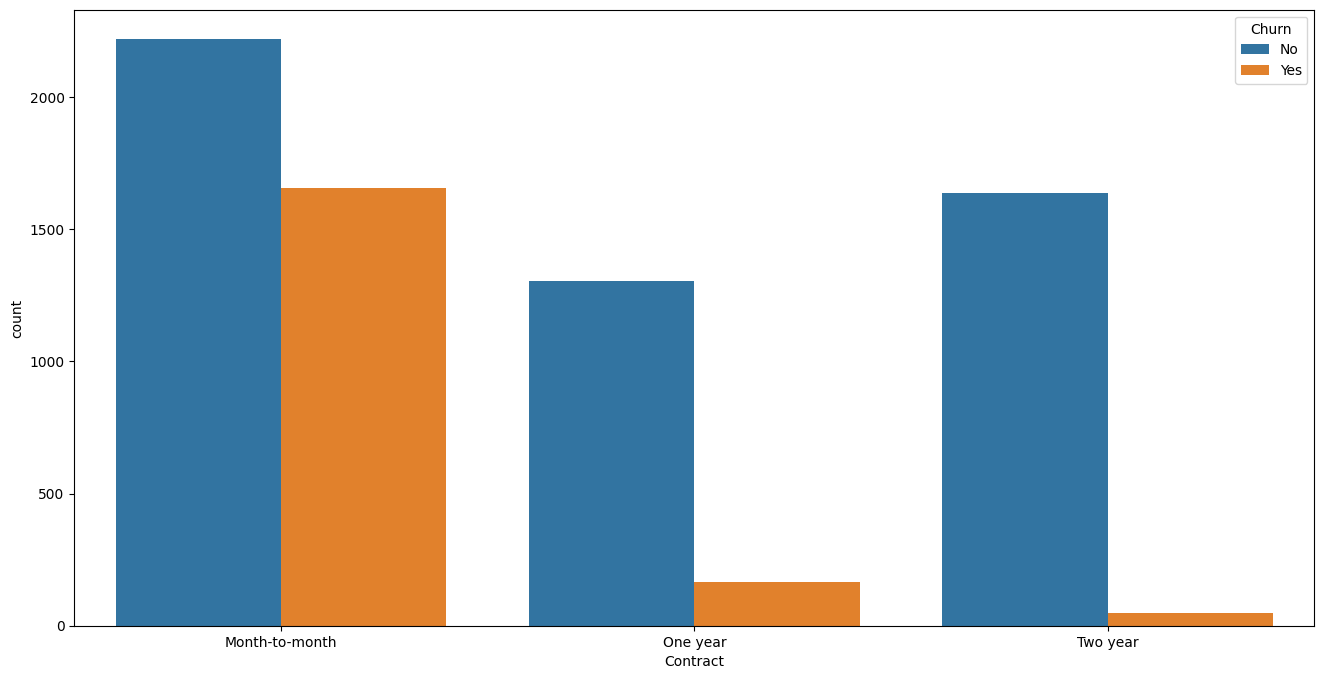

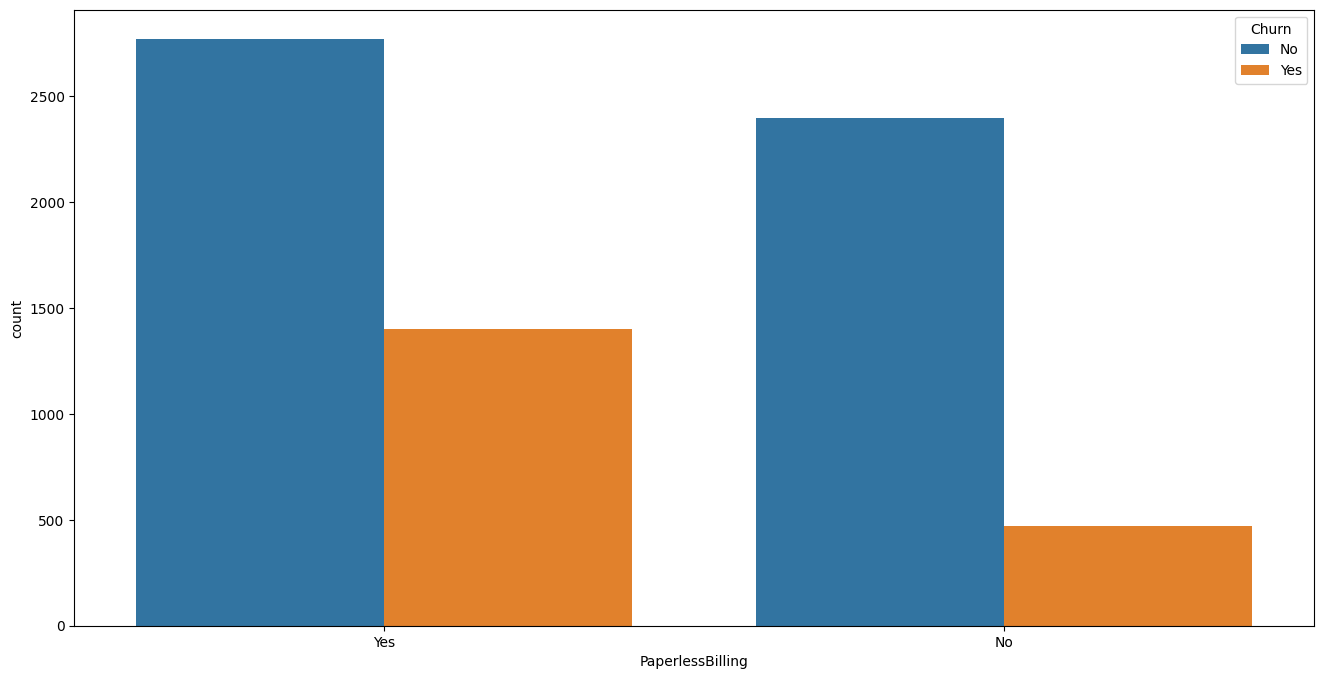

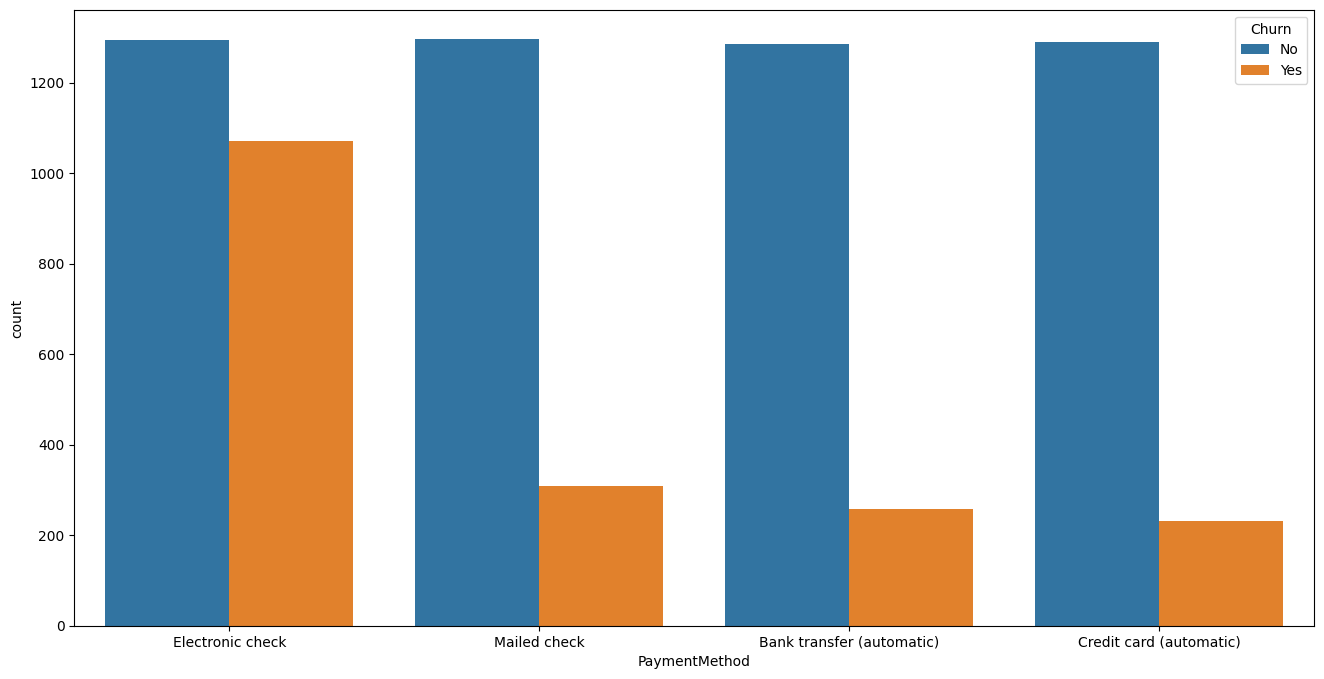

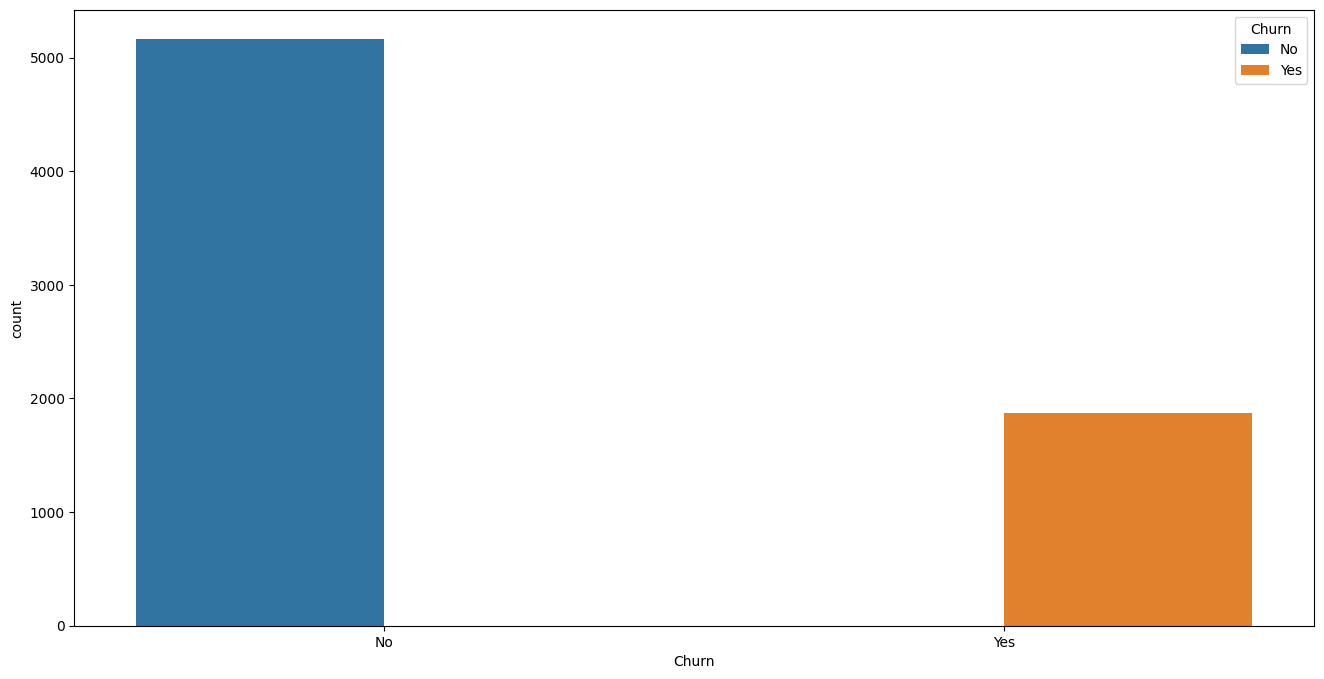

In [14]:
def plotting (column):
  fig,subplots = plt.subplots(1,1,figsize = (16,8))
  sb.countplot(x = column,hue = 'Churn', data = data)


for i in range(len(dependency_variables)):
    plotting(dependency_variables[i])

**encoding**

In [15]:
label_encoder = preprocessing.LabelEncoder()
for i in dependency_variables:
  data[i]= label_encoder.fit_transform(data[i])
  data[i].unique()
  print(i)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


In [16]:
data = pd.DataFrame(data)

In [17]:
#spliting data into dependent and independent variables
y = data['Churn']
X = data.drop('Churn',axis = 1)

In [18]:
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X,columns =  data.drop('Churn',axis = 1).columns)


In [19]:
#Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#model fitting and feature selection
selection = SelectFromModel(RandomForestClassifier(n_estimators = 100))
selection.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [21]:
#get important features
selection.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True])

In [22]:
features_selected= X_train.columns[(selection.get_support())]
len(features_selected)

4

In [23]:
features_selected

Index(['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges'], dtype='object')

train the neural network

In [24]:
columnstoDrop = ['Partner','Dependents','PhoneService','MultipleLines','DeviceProtection',
'StreamingTV','StreamingMovies', 'PaperlessBilling']
X.drop(columns=columnstoDrop, inplace = True)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X.columns

Index(['gender', 'SeniorCitizen', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [27]:
inputLayer = Input(shape=(X_train.shape[1],))
hiddenLayer_1 = Dense(32, activation='relu')(inputLayer)
hiddenLayer_2 = Dense(24, activation='relu')(hiddenLayer_1)
outputLayer = Dense(1, activation='sigmoid')(hiddenLayer_2)


In [47]:
model = Model(inputs=inputLayer, outputs=outputLayer)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
176/176 [==============================] - 2s 4ms/step - loss: 0.4045 - accuracy: 0.8064 - val_loss: 0.4408 - val_accuracy: 0.7903
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4043 - accuracy: 0.8050 - val_loss: 0.4407 - val_accuracy: 0.7903
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4042 - accuracy: 0.8069 - val_loss: 0.4407 - val_accuracy: 0.7861
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8062 - val_loss: 0.4405 - val_accuracy: 0.7889
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4040 - accuracy: 0.8069 - val_loss: 0.4407 - val_accuracy: 0.7896
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4039 - accuracy: 0.8059 - val_loss: 0.4407 - val_accuracy: 0.7896
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4037 - accuracy: 0.8073 - val_loss: 0.4407 - val_accuracy: 0.7854

In [29]:
accuracy_score = model.evaluate(X_train, y_train)
accuracy_score*100

176/176 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8062


[0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026569366455,
 0.8062222003936768,
 0.40390026

**GRID** **SEARCH**

In [30]:
#create the model
def model_created(optimizer='adam',hidden_layer_sizes=(64,), activation='relu'):
   model = Sequential()
   model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
   model.add(Dense(1, activation='sigmoid'))
   optimizer = ['SGD', 'Adam', 'RMSProp']
   # Compile model
   model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
   return model

In [32]:
def create_model(optimizer='adam', hidden_layer_sizes=(64,), activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_layer_sizes[0], activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)
batch_size = [8,16,32]
epochs = [10,50,100,250]
activation = ['relu', 'elu', 'swish', 'leaky_relu']

param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [33]:
bestModel = grid_result.best_estimator_

In [56]:
X_test

,gender,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges
2476,0.990658,2.271039,1.164390,1.529285,0.245087,0.106938,0.236348,1.574587,-1.473857,-1.322910,-0.344810
6773,-1.009430,-0.440327,-0.546857,1.529285,0.245087,0.106938,0.236348,-0.826735,-1.473857,-1.332882,-0.801836
6116,0.990658,-0.440327,-0.791321,0.172835,-0.917837,-1.028998,-0.924267,-0.826735,-0.537026,1.244914,-0.407790
3047,0.990658,-0.440327,0.186535,-1.183614,1.408012,-1.028998,-0.924267,-0.826735,1.336636,-0.324035,-0.111422
4092,-1.009430,-0.440327,-1.076528,-1.183614,1.408012,-1.028998,-0.924267,-0.826735,-1.473857,-1.174990,-0.936134
...,...,...,...,...,...,...,...,...,...,...,...
1728,0.990658,-0.440327,-1.280248,1.529285,0.245087,0.106938,0.236348,-0.826735,1.336636,-1.520691,-0.998959
5241,0.990658,-0.440327,-0.832064,0.172835,-0.917837,-1.028998,-0.924267,-0.826735,0.399805,0.988963,-0.489608
5456,-1.009430,-0.440327,-0.261649,-1.183614,-0.917837,1.242875,-0.924267,0.373926,1.336636,-0.290794,-0.322111
5842,-1.009430,2.271039,0.105047,0.172835,1.408012,1.242875,1.396963,0.373926,-1.473857,1.529120,0.685164


In [57]:
y_pred = bestModel.predict(X_test)


In [61]:
y_pred = y_pred.astype(float)

In [63]:
#Caculating the accuracy scores
#accuracyScore = accuracy_score(y_test, y_pred)
#print("The test Accuracy: ", accuracyScore)
y_pred = bestModel.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred)
print("The AUC Score: ", auc_score)

The AUC Score:  0.83933017896061


In [65]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)

with open('encode.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [70]:
grid_result.best_params_

{'batch_size': 8, 'epochs': 10}

In [82]:
from tensorflow.keras.losses import binary_crossentropy

def createModel(dropout_rate=0.2, loss=binary_crossentropy, metrics=['accuracy']):
    input_layer = Input(shape=(X.shape[1],))
    hidden_layer1 = Dense(64, activation='relu')(input_layer)
    dropout_1 = Dropout(dropout_rate)(hidden_layer1)
    hidden_layer2 = Dense(32, activation='relu')(dropout_1)
    dropout_2 = Dropout(dropout_rate)(hidden_layer2)
    hidden_layer3 = Dense(8, activation='relu')(dropout_2)
    dropout_3 = Dropout(dropout_rate)(hidden_layer3)
    output_layer = Dense(1, activation='sigmoid')(dropout_3)

    model = Model(inputs=input_layer, outputs=output_layer)
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss=loss, metrics=metrics)

    return model
saveModel = createModel()

In [83]:

save_hist = save_model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)
saveModel.save('best_model.h5')

Epoch 1/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4568 - accuracy: 0.7842 - val_loss: 0.4144 - val_accuracy: 0.7920
Epoch 2/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4527 - accuracy: 0.7800 - val_loss: 0.4133 - val_accuracy: 0.7964
Epoch 3/10
450/450 [==============================] - 2s 4ms/step - loss: 0.4584 - accuracy: 0.7804 - val_loss: 0.4095 - val_accuracy: 0.8044
Epoch 4/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4474 - accuracy: 0.7782 - val_loss: 0.4465 - val_accuracy: 0.7236
Epoch 5/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4577 - accuracy: 0.7720 - val_loss: 0.4193 - val_accuracy: 0.8027
Epoch 6/10
450/450 [==============================] - 2s 4ms/step - loss: 0.4457 - accuracy: 0.7860 - val_loss: 0.4416 - val_accuracy: 0.7707
Epoch 7/10
450/450 [==============================] - 2s 4ms/step - loss: 0.4531 - accuracy: 0.7793 - val_loss: 0.4060 - val_accuracy: 0.7982
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
saveModel.save('best_model.h5')